# Data manipulation with pandas

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### Introducting Data Frame

In [272]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [273]:
# It displays column names and data types
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [274]:
# It shows the number of rows times the number of columns
tips.shape

(244, 7)

In [275]:
# It calculates some summary statistics for the columns
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [276]:
tips.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [277]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### Sorting and subsetting

In [278]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [279]:
# It sorts values in ascending order
tips.sort_values('tip')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [280]:
# It sorts values in descending order
tips.sort_values('tip', ascending = False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


In [281]:
# It sorts by multiple variables
tips.sort_values(['tip', 'total_bill'], ascending=[True, False])

,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


#### Subsetting 

In [282]:
tips[['time', 'size']]

,time,size
0,Dinner,2
1,Dinner,3
2,Dinner,3
3,Dinner,2
4,Dinner,4
...,...,...
239,Dinner,3
240,Dinner,2
241,Dinner,2
242,Dinner,2


In [283]:
tips['tip'] > 5

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240    False
241    False
242    False
243    False
Name: tip, Length: 244, dtype: bool

In [284]:
tips[tips['day'] == 'Sat']

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [285]:
tips[(tips['day'] == 'Sat') & (tips['sex'] == 'Female')]

,total_bill,tip,sex,smoker,day,time,size
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
29,19.65,3.00,Female,No,Sat,Dinner,2
32,15.06,3.00,Female,No,Sat,Dinner,2
33,20.69,2.45,Female,No,Sat,Dinner,4
37,16.93,3.07,Female,No,Sat,Dinner,3
57,26.41,1.50,Female,No,Sat,Dinner,2
66,16.45,2.47,Female,No,Sat,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
71,17.07,3.00,Female,No,Sat,Dinner,3


In [286]:
# .isin()
tips[tips['day'].isin(['Sat', 'Sun'])]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


#### New Columns

In [287]:
tips['%'] = (tips['tip'] / tips['total_bill'])* 100
tips

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


### Summary statistics

In [288]:
# Average
tips['total_bill'].mean()

19.785942622950824

In [289]:
# Creating a function that calculates the 30th percentile of a column
def pct30(column):
    return column.quantile(0.3)

# Creating a function that calculates the 40th percentile of a column
def pct40(column):
    return column.quantile(0.4)

In [290]:
tips['total_bill'].agg(pct30)

# Without creating a function:
tips['total_bill'].quantile(0.3)

14.248999999999999

In [291]:
tips[['total_bill', 'tip']].agg(pct30)

total_bill    14.249
tip            2.000
dtype: float64

In [292]:
tips[['total_bill', 'tip']].agg([pct30, np.median])

,total_bill,tip
pct30,14.249,2.0
median,17.795,2.9


In [293]:
tips['total_bill'].agg([pct30, pct40])

pct30    14.249
pct40    16.222
Name: total_bill, dtype: float64

In [294]:
tips_1 = tips.iloc[0:5,0:7]
tips_1

# Cumulative values 
tips_1['total_bill'].cumsum()

0    16.99
1    27.33
2    48.34
3    72.02
4    96.61
Name: total_bill, dtype: float64

#### Counting

In [295]:
# Removing duplicates
tips.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [296]:
tips.drop_duplicates(subset=['time','size'])

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
77,27.20,4.00,Male,No,Thur,Lunch,4,14.705882
78,22.76,3.00,Male,No,Thur,Lunch,2,13.181019
82,10.07,1.83,Female,No,Thur,Lunch,1,18.172790
125,29.80,4.20,Female,No,Thur,Lunch,6,14.093960
129,22.82,2.18,Male,No,Thur,Lunch,3,9.553024
142,41.19,5.00,Male,No,Thur,Lunch,5,12.138869


In [297]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [298]:
# Representation as a % of the sum
tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

#### Grouped summary statistics

In [299]:
# Grouping
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [300]:
tips.groupby('day')['total_bill'].agg(['sum', 'min', 'max', 'median'])
# Another way: median

,sum,min,max,median
day,,,,
Thur,1096.33,7.51,43.11,16.20
Fri,325.88,5.75,40.17,15.38
Sat,1778.40,3.07,50.81,18.24
Sun,1627.16,7.25,48.17,19.63


In [301]:
tips.groupby(['day', 'time'])[['total_bill', 'tip']].mean()

total_bill       tip
day  time                        
Thur Lunch    17.664754  2.767705
     Dinner   18.780000  3.000000
Fri  Lunch    12.845714  2.382857
     Dinner   19.663333  2.940000
Sat  Lunch          NaN       NaN
     Dinner   20.441379  2.993103
Sun  Lunch          NaN       NaN
     Dinner   21.410000  3.255132

#### Pivot tables

In [302]:
tips.pivot_table(values='total_bill', index = 'day')
# The 'values' argument is the column we want to summarize
# The 'index' argument is the column by which we want to group

# By default, a pivot table returns the mean for each group

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


In [303]:
# The 'aggfunc' argument allows us to specify how to summarize (in this case, it returns the median)
tips.pivot_table(values = 'total_bill', index = 'day', aggfunc = np.median)

,total_bill
day,
Thur,16.20
Fri,15.38
Sat,18.24
Sun,19.63


In [304]:
tips.pivot_table(values = 'tip', index = 'day', aggfunc = [np.mean, np.median])

,mean,median
,tip,tip
day,,
Thur,2.771452,2.305
Fri,2.734737,3.000
Sat,2.993103,2.750
Sun,3.255132,3.150


In [305]:
tips.pivot_table(values='total_bill', index = 'day', columns = 'time')
# The 'columns' argument allows us to group by two variables

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


In [306]:
tips.pivot_table(values='total_bill', index = 'day', columns = 'time', fill_value=0)
# The 'fill_value' argument allows replacing NaN with any desired value

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,0.000000,20.441379
Sun,0.000000,21.410000


In [307]:
tips.pivot_table(values='total_bill', index = 'day', columns = 'time', fill_value=0, margins = True)
# The 'margins' argument returns the mean of all values in the column or row

time,Lunch,Dinner,All
day,,,
Thur,17.664754,18.780000,17.682742
Fri,12.845714,19.663333,17.151579
Sat,0.000000,20.441379,20.441379
Sun,0.000000,21.410000,21.410000
All,17.168676,20.797159,19.785943


## Slacing and indexing DataFrames

In [308]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


The **loc()** function is used for selecting rows based on row labels (indices). In the case of a DataFrame, this function allows selecting rows based on both row and column labels, while for a Series, it enables selecting rows solely based on row labels.

In [309]:
# .loc method filters row values (index).
tips.loc[6]

total_bill         8.77
tip                 2.0
sex                Male
smoker               No
day                 Sun
time             Dinner
size                  2
%             22.805017
Name: 6, dtype: object

In [310]:
# Setting an index
tips_i = tips.set_index('day')
tips_i

,total_bill,tip,sex,smoker,time,size,%
day,,,,,,,
Sun,16.99,1.01,Female,No,Dinner,2,5.944673
Sun,10.34,1.66,Male,No,Dinner,3,16.054159
Sun,21.01,3.50,Male,No,Dinner,3,16.658734
Sun,23.68,3.31,Male,No,Dinner,2,13.978041
Sun,24.59,3.61,Female,No,Dinner,4,14.680765
...,...,...,...,...,...,...,...
Sat,29.03,5.92,Male,No,Dinner,3,20.392697
Sat,27.18,2.00,Female,Yes,Dinner,2,7.358352
Sat,22.67,2.00,Male,Yes,Dinner,2,8.822232


In [311]:
tips_i.loc['Fri']

,total_bill,tip,sex,smoker,time,size,%
day,,,,,,,
Fri,28.97,3.00,Male,Yes,Dinner,2,10.355540
Fri,22.49,3.50,Male,No,Dinner,2,15.562472
Fri,5.75,1.00,Female,Yes,Dinner,2,17.391304
Fri,16.32,4.30,Female,Yes,Dinner,2,26.348039
Fri,22.75,3.25,Female,No,Dinner,2,14.285714
Fri,40.17,4.73,Male,Yes,Dinner,4,11.774956
Fri,27.28,4.00,Male,Yes,Dinner,2,14.662757
Fri,12.03,1.50,Male,Yes,Dinner,2,12.468828
Fri,21.01,3.00,Male,Yes,Dinner,2,14.278915


In [312]:
tips_i = tips.set_index(['day', 'time'])
tips_i

total_bill   tip     sex smoker  size          %
day  time                                                    
Sun  Dinner       16.99  1.01  Female     No     2   5.944673
     Dinner       10.34  1.66    Male     No     3  16.054159
     Dinner       21.01  3.50    Male     No     3  16.658734
     Dinner       23.68  3.31    Male     No     2  13.978041
     Dinner       24.59  3.61  Female     No     4  14.680765
...                 ...   ...     ...    ...   ...        ...
Sat  Dinner       29.03  5.92    Male     No     3  20.392697
     Dinner       27.18  2.00  Female    Yes     2   7.358352
     Dinner       22.67  2.00    Male    Yes     2   8.822232
     Dinner       17.82  1.75    Male     No     2   9.820426
Thur Dinner       18.78  3.00  Female     No     2  15.974441

[244 rows x 6 columns]

In [313]:
tips_i.loc[['Sat', 'Sun']]

total_bill   tip     sex smoker  size          %
day time                                                    
Sat Dinner       20.65  3.35    Male     No     3  16.222760
    Dinner       17.92  4.08    Male     No     2  22.767857
    Dinner       20.29  2.75  Female     No     2  13.553475
    Dinner       15.77  2.23  Female     No     2  14.140774
    Dinner       39.42  7.58    Male     No     4  19.228818
...                ...   ...     ...    ...   ...        ...
Sun Dinner       20.90  3.50  Female    Yes     3  16.746411
    Dinner       30.46  2.00    Male    Yes     5   6.565988
    Dinner       18.15  3.50  Female    Yes     3  19.283747
    Dinner       23.10  4.00    Male    Yes     3  17.316017
    Dinner       15.69  1.50    Male    Yes     2   9.560229

[163 rows x 6 columns]

In [314]:
# Filtering by levels of indexes
tips_i.loc[[('Fri', 'Lunch'), ('Sun', 'Dinner')]]

total_bill   tip     sex smoker  size          %
day time                                                    
Fri Lunch        12.16  2.20    Male    Yes     2  18.092105
    Lunch        13.42  3.48  Female    Yes     2  25.931446
    Lunch         8.58  1.92    Male    Yes     1  22.377622
    Lunch        15.98  3.00  Female     No     3  18.773467
    Lunch        13.42  1.58    Male    Yes     2  11.773472
...                ...   ...     ...    ...   ...        ...
Sun Dinner       20.90  3.50  Female    Yes     3  16.746411
    Dinner       30.46  2.00    Male    Yes     5   6.565988
    Dinner       18.15  3.50  Female    Yes     3  19.283747
    Dinner       23.10  4.00    Male    Yes     3  17.316017
    Dinner       15.69  1.50    Male    Yes     2   9.560229

[83 rows x 6 columns]

In [315]:
tips_i.sort_index()

total_bill   tip     sex smoker  size          %
day  time                                                    
Thur Lunch        27.20  4.00    Male     No     4  14.705882
     Lunch        22.76  3.00    Male     No     2  13.181019
     Lunch        17.29  2.71    Male     No     2  15.673800
     Lunch        19.44  3.00    Male    Yes     2  15.432099
     Lunch        16.66  3.40    Male     No     2  20.408163
...                 ...   ...     ...    ...   ...        ...
Sun  Dinner       20.90  3.50  Female    Yes     3  16.746411
     Dinner       30.46  2.00    Male    Yes     5   6.565988
     Dinner       18.15  3.50  Female    Yes     3  19.283747
     Dinner       23.10  4.00    Male    Yes     3  17.316017
     Dinner       15.69  1.50    Male    Yes     2   9.560229

[244 rows x 6 columns]

In [316]:
tips_i.sort_index(level=['day', 'time'], ascending = [True, False])

total_bill   tip     sex smoker  size          %
day  time                                                    
Thur Dinner       18.78  3.00  Female     No     2  15.974441
     Lunch        27.20  4.00    Male     No     4  14.705882
     Lunch        22.76  3.00    Male     No     2  13.181019
     Lunch        17.29  2.71    Male     No     2  15.673800
     Lunch        19.44  3.00    Male    Yes     2  15.432099
...                 ...   ...     ...    ...   ...        ...
Sun  Dinner       20.90  3.50  Female    Yes     3  16.746411
     Dinner       30.46  2.00    Male    Yes     5   6.565988
     Dinner       18.15  3.50  Female    Yes     3  19.283747
     Dinner       23.10  4.00    Male    Yes     3  17.316017
     Dinner       15.69  1.50    Male    Yes     2   9.560229

[244 rows x 6 columns]

In [317]:
tips_i.loc[:, ['total_bill', 'tip']]

total_bill   tip
day  time                    
Sun  Dinner       16.99  1.01
     Dinner       10.34  1.66
     Dinner       21.01  3.50
     Dinner       23.68  3.31
     Dinner       24.59  3.61
...                 ...   ...
Sat  Dinner       29.03  5.92
     Dinner       27.18  2.00
     Dinner       22.67  2.00
     Dinner       17.82  1.75
Thur Dinner       18.78  3.00

[244 rows x 2 columns]

In [318]:
tips.iloc[10:16, 0:7]

,total_bill,tip,sex,smoker,day,time,size
10,10.27,1.71,Male,No,Sun,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4
12,15.42,1.57,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2


#### Working with pivot table

In [319]:
tips_pt = tips.pivot_table('total_bill', index='day', columns='sex')
tips_pt

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


In [320]:
# The 'axis' parameter specifies the axis along which we are summarizing
tips_pt.mean(axis='index')
# Column index

sex
Male      20.315363
Female    17.603362
dtype: float64

In [321]:
tips_pt.mean(axis='columns')
# 'columns' - rows

day
Thur    17.714990
Fri     17.001278
Sat     20.241450
Sun     20.879732
dtype: float64

### Visualizing data

In [322]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<AxesSubplot:>

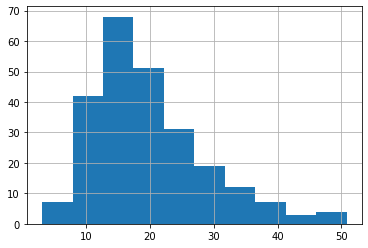

In [323]:
tips['total_bill'].hist()

<AxesSubplot:>

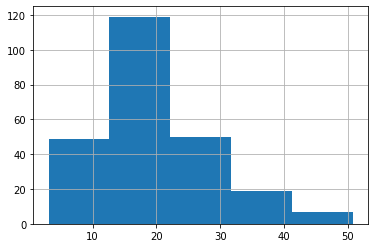

In [324]:
tips['total_bill'].hist(bins=5)

In [325]:
t= tips.groupby('day')['total_bill'].mean()
t

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

<AxesSubplot:title={'center':'Average total bill per days'}, xlabel='day'>

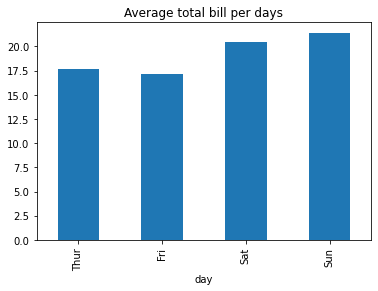

In [326]:
t.plot(kind='bar', title='Average total bill per days')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

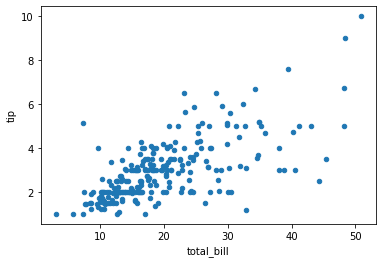

In [327]:
tips.plot(x='total_bill', y='tip', kind='scatter')

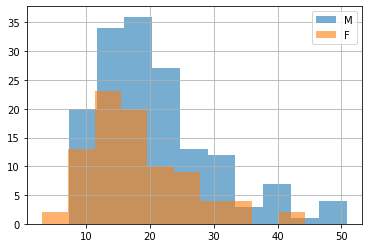

In [328]:
tips[tips['sex'] == 'Male']['total_bill'].hist(alpha=0.6)
tips[tips['sex'] == 'Female']['total_bill'].hist(alpha=0.6)
plt.legend(['M', 'F'])
# 'alpha' corresponds to transparency.

#### Missing values

In [329]:
# Checks for missing values in a column
tips.isna().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
%             False
dtype: bool

In [330]:
# Displays the count of missing values in a column
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
%             0
dtype: int64

In [331]:
# Removes rows with missing values
tips.dropna()

,total_bill,tip,sex,smoker,day,time,size,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [332]:
# Fills in missing values
# tips.fillna(0)

#### DataFrame to CSV

In [333]:
# tips.to_csv('tips')

# Exploratory Data Analysis in Python

In [334]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [335]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [336]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [337]:
titanic.sort_values('fare', ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [338]:
# replace poz
titanic = titanic.replace(512.3292, 3421.3213)
titanic.sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
737,1,1,male,35.0,0,0,3421.3213,C,First,man,True,B,Cherbourg,yes,True
258,1,1,female,35.0,0,0,3421.3213,C,First,woman,False,NaN,Cherbourg,yes,True


Text(0, 0.5, 'Fraction of age')

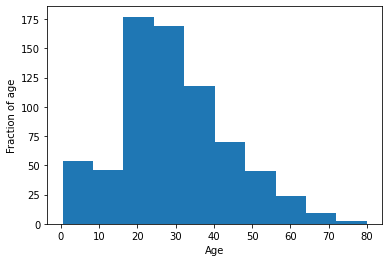

In [339]:
#titanic['age'].dropna().hist()
plt.hist(titanic['age'].dropna())
plt.xlabel('Age')
plt.ylabel('Fraction of age')

In [340]:
titanic['age'].dropna().mean()

29.69911764705882

In [341]:
titanic['age'].isna().sum()

177